# Requierments

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_figure(images: list, titles: list, rows: int, columns: int, fig_width=15, fig_height=7):
    fig = plt.figure(figsize=(fig_width, fig_height))
    count = 1
    for image, title in zip(images, titles):
        fig.add_subplot(rows, columns, count)
        count += 1

        # Check if the image is a histogram; if so, use 'b' colormap
        if "Histogram" in title:
            plt.plot(image, color='b')
            plt.axis('on')
        else:
            plt.imshow(image, cmap='gray')
            plt.axis('off')

        plt.title(title)


#Question 1

In [12]:


# Load the image
img = cv2.imread('/content/einstein.jpg')

# Zoom factor
zoom_factor = 2

# Pixel Replication
def pixel_replication(img, zoom_factor):
    height, width, channels = img.shape
    new_height, new_width = height * zoom_factor, width * zoom_factor
    zoomed_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            zoomed_img[i * zoom_factor: (i + 1) * zoom_factor, j * zoom_factor: (j + 1) * zoom_factor] = img[i, j]

    return zoomed_img

# Zero-Order Hold
def zero_order_hold(img, zoom_factor):
    height, width, channels = img.shape
    new_height, new_width = height * zoom_factor, width * zoom_factor
    zoomed_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = int(i / zoom_factor)
            y = int(j / zoom_factor)
            zoomed_img[i, j] = img[x, y]

    return zoomed_img

# Apply zooming methods
img_pixel_replication = pixel_replication(img, zoom_factor)
img_zero_order_hold = zero_order_hold(img, zoom_factor)




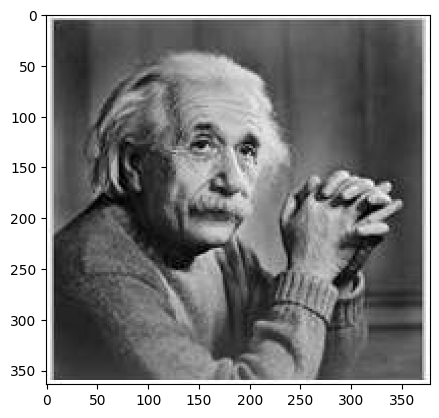

(364, 378, 3)

In [13]:
plt.imshow(cv2.cvtColor(img_pixel_replication, cv2.COLOR_BGR2RGB))
plt.show()
img_pixel_replication.shape

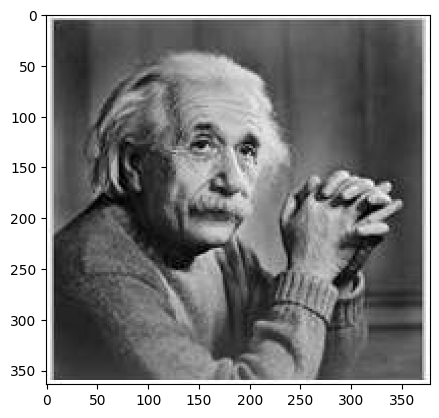

(364, 378, 3)

In [14]:
plt.imshow(cv2.cvtColor(img_zero_order_hold, cv2.COLOR_BGR2RGB))
plt.show()
img_zero_order_hold.shape

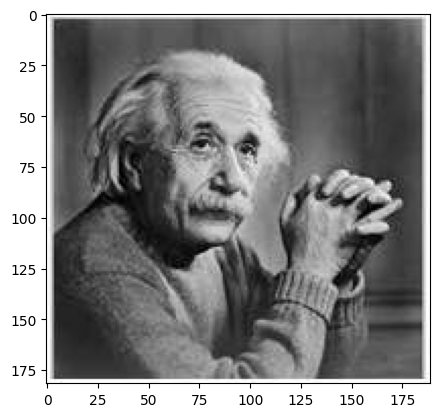

(182, 189, 3)

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

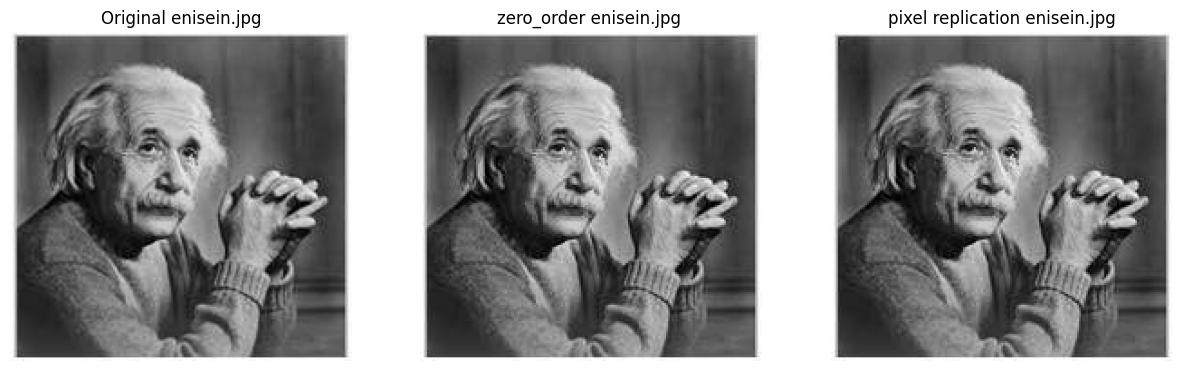

In [16]:
image_name= 'enisein.jpg'
plot_figure(
    [img, img_zero_order_hold, img_pixel_replication],
    [f'Original {image_name}', f'zero_order {image_name} ', f'pixel replication {image_name}'],
    1, 3
)

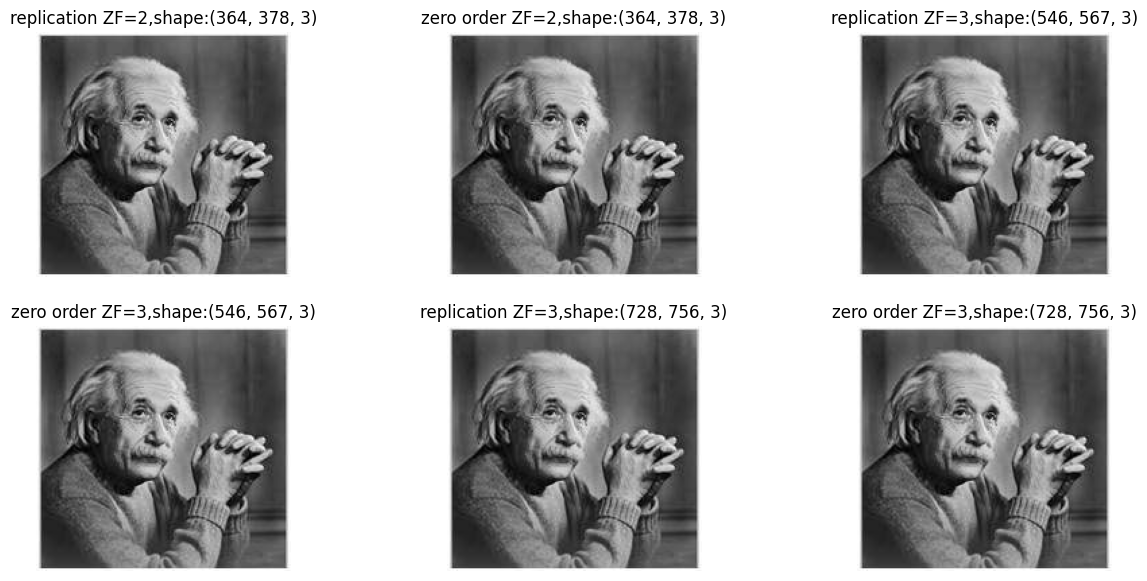

In [17]:
#Ex with different zoom factor
#ZF=2
img_pixel_replication_2 = pixel_replication(img, zoom_factor=2)
img_zero_order_hold_2 = zero_order_hold(img, zoom_factor=2)

#ZF=3
img_pixel_replication_3 = pixel_replication(img, zoom_factor=3)
img_zero_order_hold_3 = zero_order_hold(img, zoom_factor=3)

#ZF=4
img_pixel_replication_4 = pixel_replication(img, zoom_factor=4)
img_zero_order_hold_4 = zero_order_hold(img, zoom_factor=4)

plot_figure(
    [img_pixel_replication_2, img_zero_order_hold_2,img_pixel_replication_3, img_zero_order_hold_3,img_pixel_replication_4, img_zero_order_hold_4],
    [f'replication ZF=2,shape:{img_pixel_replication_2.shape}',f'zero order ZF=2,shape:{img_zero_order_hold_2.shape}',
     f'replication ZF=3,shape:{img_pixel_replication_3.shape}',f'zero order ZF=3,shape:{img_zero_order_hold_3.shape}',
     f'replication ZF=3,shape:{img_pixel_replication_4.shape}',f'zero order ZF=3,shape:{img_zero_order_hold_4.shape}'],
    2, 3
)

# Question 2

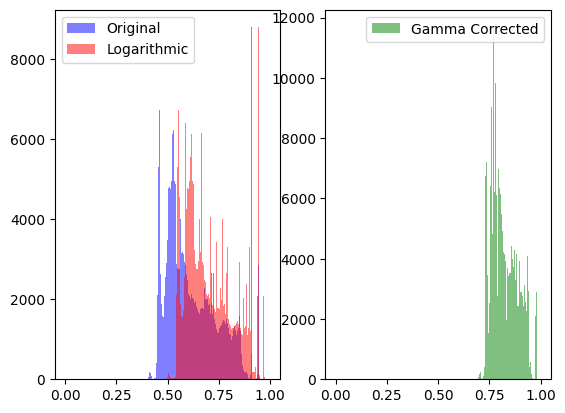

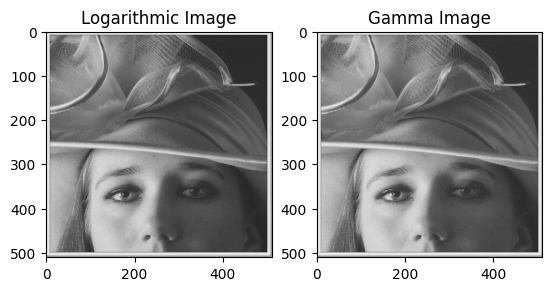

In [8]:
# Load low contrast image and normalize
img = cv2.imread('/content/low_contrast.jpg', cv2.IMREAD_GRAYSCALE)
img_normalized = img / 255.0  # Normalizing to range [0, 1]

# Logarithmic Correction
c = 1 / np.log(1 + np.max(img_normalized))  # Calculate scaling factor
log_img = c * np.log(1 + img_normalized)

# Gamma Correction
gamma = 0.4
gamma_img = np.power(img_normalized, gamma)

# Plot histograms
plt.subplot(1, 2, 1)
plt.hist(img_normalized.ravel(), bins=256, range=(0.0, 1.0), color='blue', alpha=0.5, label="Original")
plt.hist(log_img.ravel(), bins=256, range=(0.0, 1.0), color='red', alpha=0.5, label="Logarithmic")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(gamma_img.ravel(), bins=256, range=(0.0, 1.0), color='green', alpha=0.5, label="Gamma Corrected")
plt.legend()
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(log_img, cmap='gray')
plt.title('Logarithmic Image')
plt.subplot(1, 2, 2)
plt.imshow(gamma_img, cmap='gray')
plt.title('Gamma Image')
plt.show()

# Question 3

Normalize Image and Plot Histogram:

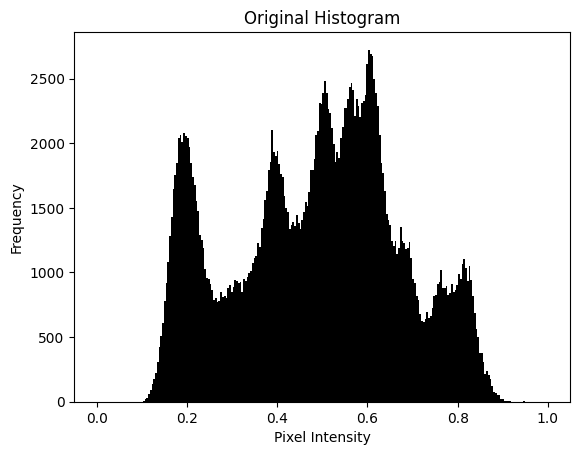

In [ ]:

# Load the GIF image with Pillow
img_pil = Image.open('lena_gray.gif').convert('L')  # Convert to grayscale
img = np.array(img_pil)  # Convert to a NumPy array for OpenCV compatibility
img_normalized = img / 255.0  # Normalized to range [0, 1]

# Plot original histogram
plt.hist(img_normalized.ravel(), bins=256, range=(0.0, 1.0), color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Histogram Equalization and Comparison:

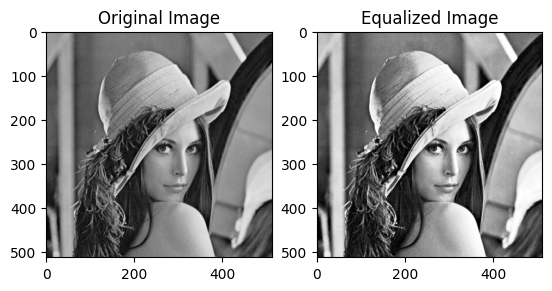

In [ ]:
# Histogram Equalization
equalized_img = cv2.equalizeHist(img)

# Display images and histograms
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

In [ ]:
# Convert to a range of [0, 255] for processing
img = (img_normalized * 255).astype(np.uint8)

# Compute histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Compute CDF
cdf = hist.cumsum()  # Cumulative sum of the histogram values
cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize CDF to the histogram's max value for plotting

# Normalize CDF for equalization
cdf_min = cdf.min()
cdf_m = np.ma.masked_equal(cdf, 0)  # Mask pixels with value 0
cdf_m = (cdf_m - cdf_min) * 255 / (cdf.max() - cdf_min)  # Scale CDF
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0 and cast to uint8

# Map original image pixels based on the equalized CDF
img_equalized = cdf[img]


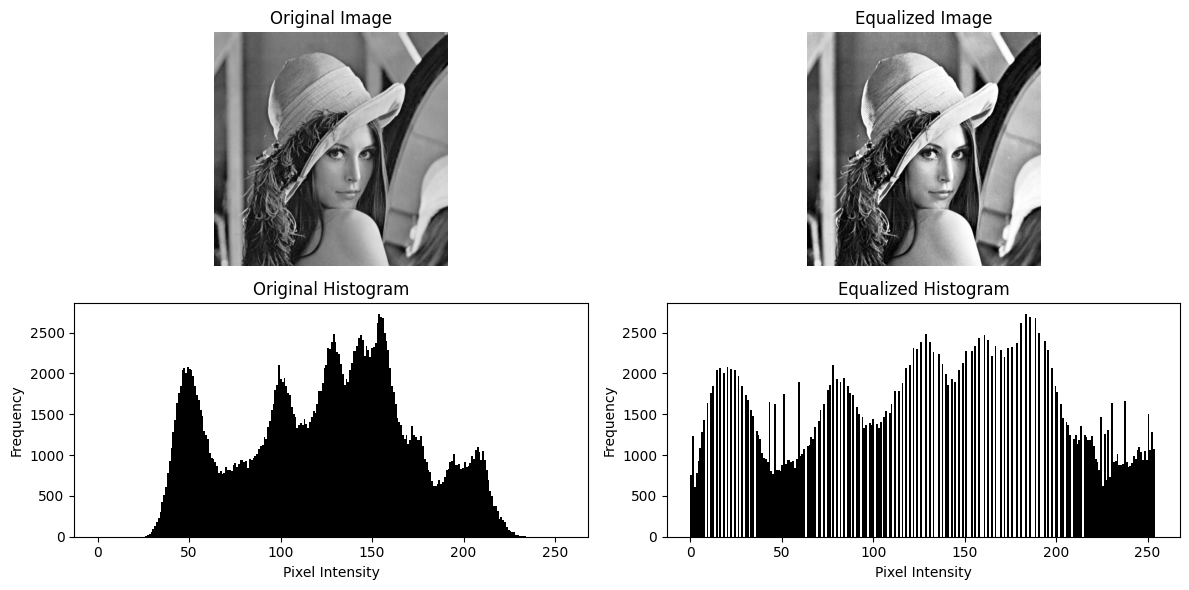

In [ ]:
# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Plot histograms of original and equalized images
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), bins=256, range=(0, 255), color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(img_equalized.ravel(), bins=256, range=(0, 255), color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Question 4

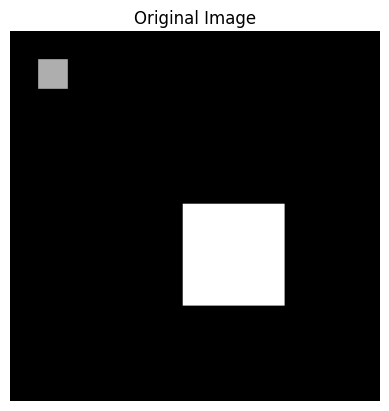

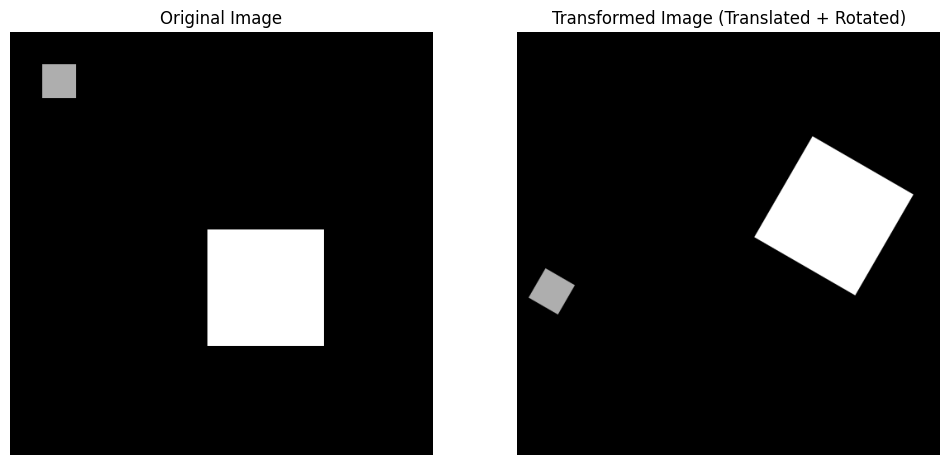

In [ ]:

# Load the GIF image with Pillow and convert to grayscale
img_pil = Image.open('square.gif').convert('L')
img = np.array(img_pil)  # Convert to NumPy array

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1. Translate the smaller square by 40 pixels in x and y directions

# Define translation matrix for the smaller square
translation_matrix = np.float32([[1, 0, 40], [0, 1, 40]])
translated_img = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))

# 2. Rotate the larger square by 60 degrees counterclockwise

# Define rotation matrix for the larger square
# Assuming rotation around the center of the image
center_y, center_x = img.shape[0] // 2, img.shape[1] // 2
rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), 60, 1)  # Rotate by 60 degrees

# Apply rotation transformation
rotated_img = cv2.warpAffine(translated_img, rotation_matrix, (img.shape[1], img.shape[0]))

# 3. Display the transformed images

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_img, cmap='gray')
plt.title("Transformed Image (Translated + Rotated)")
plt.axis('off')
plt.show()


#Question 5


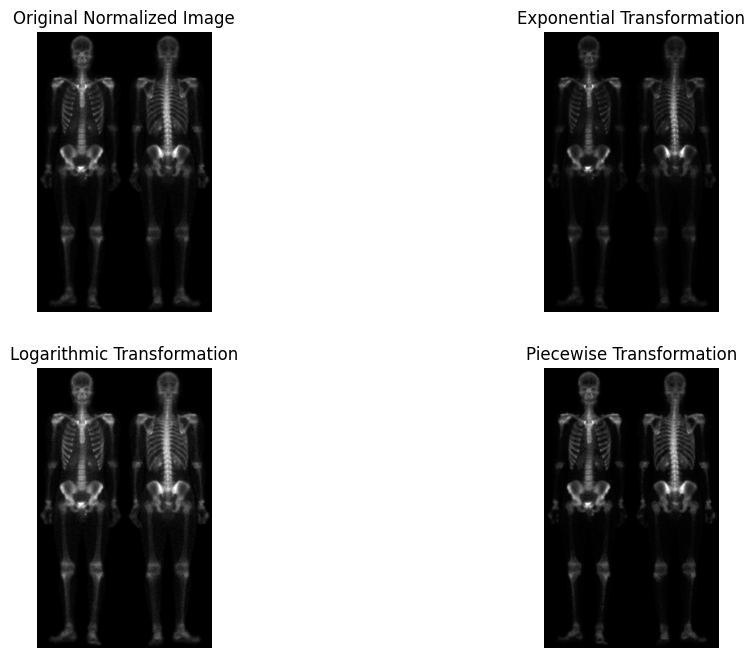

In [ ]:
# Load the GIF image and convert to grayscale
img_pil = Image.open('skeleton.gif').convert('L')
img = np.array(img_pil)

# Normalize the image to range [0, 1]
f_xy = img / 255.0

# 1. Exponential Transformation
g_exp = np.exp(f_xy)

# 2. Logarithmic Transformation
c = 1  # Scaling constant; can be adjusted based on the image contrast needs
g_log = c * np.log10(f_xy + 1)

# 3. Piecewise Transformation
g_piecewise = np.where(f_xy < 0.1, f_xy, 2 * f_xy)

# Display the original and transformed images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(f_xy, cmap='gray')
plt.title('Original Normalized Image')
plt.axis('off')

# Exponential Transformation
plt.subplot(2, 2, 2)
plt.imshow(g_exp, cmap='gray')
plt.title('Exponential Transformation')
plt.axis('off')

# Logarithmic Transformation
plt.subplot(2, 2, 3)
plt.imshow(g_log, cmap='gray')
plt.title('Logarithmic Transformation')
plt.axis('off')

# Piecewise Transformation
plt.subplot(2, 2, 4)
plt.imshow(g_piecewise, cmap='gray')
plt.title('Piecewise Transformation')
plt.axis('off')

plt.show()
